In [120]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [121]:
#1 Завантажте набір даних
file = pandas.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", sep=",",
encoding="utf8", engine='python')

In [122]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [123]:
file.head()  # показати n - перших записів, n - default 5

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-table-in-outdoor-black-90420332/,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-table-black-00368814/,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordviken-bar-table-and-4-bar-stools-black-black-s09333523/,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-with-backrest-black-silver-colour-80155205/,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-mounted-drop-leaf-table-white-30180504/,No,"Wall-mounted drop-leaf table, 74x60 cm",Marcus Arvonen,60.0,43.0,74.0


In [124]:
file.tail() # останні n - записів, n - default 5

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section-white-s99157902/,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s09158152/,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s59157541/,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-sections-white-s89157573/,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s69157376/,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [125]:
file.sample() # check random value, n - default 1

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3585,3585,39157387,ELVARLI,Wardrobes,2656.0,"SR 3,040",True,https://www.ikea.com/sa/en/p/elvarli-3-sections-white-s39157387/,No,"3 sections, 258x51x222-350 cm",Ehlén Johansson,50.0,NaN,258.0


In [126]:
file.shape # display rows and columns count


(3694, 14)

In [127]:
file.columns # display all columns in df

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [128]:
file.index # range index for df

RangeIndex(start=0, stop=3694, step=1)

In [129]:
file.select_dtypes(include=['float64', 'int']) # обрати потрібні типи данних

,Unnamed: 0,item_id,price,depth,height,width
0,0,90420332,265.0,NaN,99.0,51.0
1,1,368814,995.0,NaN,105.0,80.0
2,2,9333523,2095.0,NaN,NaN,NaN
3,3,80155205,69.0,50.0,100.0,60.0
4,4,30180504,225.0,60.0,43.0,74.0
...,...,...,...,...,...,...
3689,3689,99157902,750.0,50.0,NaN,91.0
3690,3690,9158152,1572.0,50.0,NaN,135.0
3691,3691,59157541,924.0,50.0,NaN,175.0
3692,3692,89157573,2745.0,50.0,NaN,178.0


In [130]:
file.select_dtypes(include=['object']) # обрати потрібні типи данних

,name,category,old_price,link,other_colors,short_description,designer
0,FREKVENS,Bar furniture,No old price,https://www.ikea.com/sa/en/p/frekvens-bar-table-in-outdoor-black-90420332/,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen
1,NORDVIKEN,Bar furniture,No old price,https://www.ikea.com/sa/en/p/nordviken-bar-table-black-00368814/,No,"Bar table, 140x80 cm",Francis Cayouette
2,NORDVIKEN / NORDVIKEN,Bar furniture,No old price,https://www.ikea.com/sa/en/p/nordviken-nordviken-bar-table-and-4-bar-stools-black-black-s09333523/,No,Bar table and 4 bar stools,Francis Cayouette
3,STIG,Bar furniture,No old price,https://www.ikea.com/sa/en/p/stig-bar-stool-with-backrest-black-silver-colour-80155205/,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz
4,NORBERG,Bar furniture,No old price,https://www.ikea.com/sa/en/p/norberg-wall-mounted-drop-leaf-table-white-30180504/,No,"Wall-mounted drop-leaf table, 74x60 cm",Marcus Arvonen
...,...,...,...,...,...,...,...
3689,ELVARLI,Wardrobes,SR 820,https://www.ikea.com/sa/en/p/elvarli-1-section-white-s99157902/,No,"1 section, 92x51x222-350 cm",Ehlén Johansson
3690,ELVARLI,Wardrobes,"SR 1,755",https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s09158152/,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson
3691,ELVARLI,Wardrobes,"SR 1,050",https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s59157541/,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson
3692,ELVARLI,Wardrobes,"SR 3,130",https://www.ikea.com/sa/en/p/elvarli-3-sections-white-s89157573/,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson


In [131]:
#  pandas.options.display.width = 0
# pandas.set_option('display.max_colwidth', None)
# with pandas.option_context("display.max_rows", None, "display.max_columns", None):


# pandas.option_context("display.max_rows", None, "display.max_columns", None)

In [132]:
file['old_price'].value_counts()

old_price
No old price    3040
SR 995            12
SR 1,385          11
SR 595            10
SR 275             8
                ... 
SR 3,145           1
SR 39              1
SR 2,105           1
SR 752             1
SR 1,050           1
Name: count, Length: 365, dtype: int64

In [133]:
file['old_price'].value_counts(normalize= True) *100 # порахувати кількість данних y %

old_price
No old price    82.295615
SR 995           0.324851
SR 1,385         0.297780
SR 595           0.270709
SR 275           0.216567
                  ...    
SR 3,145         0.027071
SR 39            0.027071
SR 2,105         0.027071
SR 752           0.027071
SR 1,050         0.027071
Name: proportion, Length: 365, dtype: float64

In [134]:
file = file.drop(['link','old_price', 'Unnamed: 0'],  axis=1) # удаление колонки

In [135]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   sellable_online    3694 non-null   bool   
 5   other_colors       3694 non-null   object 
 6   short_description  3694 non-null   object 
 7   designer           3694 non-null   object 
 8   depth              2231 non-null   float64
 9   height             2706 non-null   float64
 10  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 292.3+ KB


In [136]:
file.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
sellable_online         0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [137]:
file.describe()

,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [138]:
file['designer'].unique() # показати унікальні значення 

array(['Nicholai Wiig Hansen', 'Francis Cayouette', 'Henrik Preutz',
       'Marcus Arvonen', 'Carina Bengs', 'K Hagberg/M Hagberg',
       'Sarah Fager', 'Ehlén Johansson', 'Nike Karlsson',
       'Maja Ganszyniec', 'Karl Malmvall',
       'John/Jonas/Petrus/Paul/Caroline', 'Nike Karlsson/Maja Ganszyniec',
       'J Karlsson/N Karlsson', 'IKEA of Sweden/Karl Malmvall',
       'IKEA of Sweden', 'Nike Karlsson/J Karlsson/N Karlsson',
       'Ola Wihlborg', 'IKEA of Sweden/Tina Christensen',
       'IKEA of Sweden/K Hagberg/M Hagberg',
       'Ola Wihlborg/IKEA of Sweden',
       '504.689.53 Small and easy-to-place chair-bed which can easily be converted into a single bed.The storage space under the seat has room for bedlinen or other things.Just as nice to look at from all sides – perfect to place in the middle of the room or use as a room divider.The cushion cover is easy to keep clean and fresh, as you can take it off and machine-wash it.Easy to assemble.1 cushion included.',
       '

In [139]:
set(file['designer']) # вывод уникальных

{'002.756.74 Adjustable hinges allow you to adjust the door horizontally and vertically.Panel/glass doors provide dust-free storage and let you hide or display things according to your needs.Hinges included.Knobs included.Handle with care! A damaged edge or scratched surface can cause the glass to suddenly crack and/or break. Avoid collisions from the side - this is where the glass is most vulnerable.1 door will fit BILLY bookcase 40 cm and 2 doors will fit BILLY bookcase 80 cm.Can be used on the corner unit only if the shelf next to it has no doors.The door does not fit bookcases purchased in the spring of 2014 or earlier.',
 '003.494.44 Separate shelf for magazines, etc. helps you keep your things organised and the table top clear.The castors make it easy to move the table if needed.',
 '003.786.67 You sit comfortably thanks to the shaped back and armrests.Complete with FANBYN chair frame.',
 "003.825.94 This cover's ability to resist abrasion has been tested to handle 15,000 cycles,

In [140]:
file['designer'].nunique() # показати унікальні значення 

381

In [141]:
file['designer'] = file['designer'].replace(r'^.{3}\..*', value='No information',  regex=True) # замінюємо помилки на No information

In [142]:
pandas.options.display.width = 0
pandas.set_option('display.max_colwidth', None)
with pandas.option_context("display.max_rows", None, "display.max_columns", None):
    print(file['designer'].value_counts()) #  вывод count

designer
IKEA of Sweden                                                     828
Ehlén Johansson                                                    161
Francis Cayouette                                                  151
No information                                                     143
Ola Wihlborg                                                       134
K Hagberg/M Hagberg                                                122
Jon Karlsson                                                       120
Ehlén Johansson/IKEA of Sweden                                      75
Carina Bengs                                                        75
Henrik Preutz                                                       70
IKEA of Sweden/Ehlén Johansson                                      70
Studio Copenhagen                                                   64
H Preutz/A Fredriksson                                              60
Ebba Strandmark                                                     

In [143]:
 #Преобразуем каждую строку в список имен дизайнеров
designers_split = [sorted(item.split('/')) for item in file['designer']]

# Преобразуем каждый список обратно в строку
file['designer'] = ['/'.join(item) for item in designers_split]

# set(file['designer'])

In [144]:
file['designer'].nunique() # показати унікальні значення 

200

In [145]:
pandas.options.display.width = 0
pandas.set_option('display.max_colwidth', None)
with pandas.option_context("display.max_rows", None, "display.max_columns", None):
    print(file['designer'].value_counts()) #  вывод count

designer
IKEA of Sweden                                                     828
Ehlén Johansson                                                    161
Francis Cayouette                                                  151
Ehlén Johansson/IKEA of Sweden                                     145
No information                                                     143
Ola Wihlborg                                                       134
K Hagberg/M Hagberg                                                122
Jon Karlsson                                                       120
Carina Bengs                                                        75
Henrik Preutz                                                       70
Studio Copenhagen                                                   64
A Fredriksson/H Preutz                                              60
Ebba Strandmark                                                     57
E Lilja Löwenhielm/K Malmvall                                       

In [146]:
file.groupby('category').count() #  вывод count

,item_id,name,price,sellable_online,other_colors,short_description,designer,depth,height,width
category,,,,,,,,,,
Bar furniture,47,47,47,47,47,47,47,27,35,37
Beds,208,208,208,208,208,208,208,83,157,185
Bookcases & shelving units,548,548,548,548,548,548,548,453,442,492
Cabinets & cupboards,292,292,292,292,292,292,292,237,230,256
Café furniture,26,26,26,26,26,26,26,14,22,21
Chairs,481,481,481,481,481,481,481,278,290,389
Chests of drawers & drawer units,125,125,125,125,125,125,125,121,123,125
Children's furniture,124,124,124,124,124,124,124,94,98,118
Nursery furniture,97,97,97,97,97,97,97,66,84,93


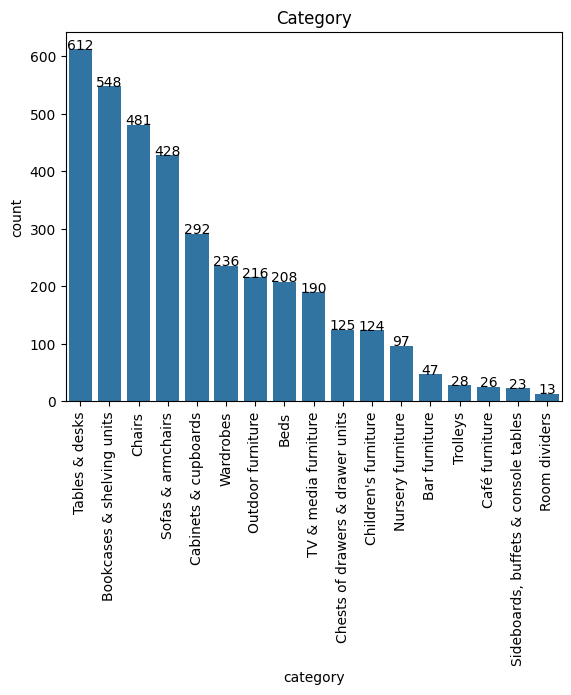

In [147]:
category_counts = file['category'].value_counts().sort_values(ascending=False)
plt.figure()
sns.countplot(x=file['category'], data=file, order=category_counts.index)
plt.xticks(rotation=90)
plt.title('Category')
for i, count in enumerate(category_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center')
plt.show()


In [148]:
# set(file['other_colors'].values) # показати по колонці значення
# set(file.['short_description'].values) 
set(file[file['category'] == 'Tables & desks']['short_description'].values)

{'        Add-on unit high,          105x65 cm',
 '        Add-on unit,          120x10 cm',
 '        Add-on unit,          58x23 cm',
 '        Add-on unit,          64x39 cm',
 '        Babycare mat,          48x74 cm',
 '        Bar table and 2 bar stools',
 '        Bar table and 2 bar stools,          74 cm',
 '        Bar table and 4 bar stools',
 '        Bar table and 4 bar stools,          120 cm',
 '        Bar table,          120x80 cm',
 '        Bar table,          140x80 cm',
 '        Bar table,          70 cm',
 '        Bar table,          70x70 cm',
 '        Bar table,          74x74 cm',
 '        Bar table, in/outdoor,          51x51 cm',
 '        Bedside table,          30x50 cm',
 '        Bedside table,          37x28 cm',
 '        Bedside table,          39x41 cm',
 '        Bedside table,          40x40 cm',
 '        Bedside table,          42x40 cm',
 '        Bedside table,          42x74 cm',
 '        Bedside table,          45x35 cm',
 '        Bedsid

In [149]:
file[file.duplicated(subset='item_id')]
file.sort_values(by='item_id')
# file.drop_duplicates(subset='item_id', inplace=True) # удаление дубликотов по item_id

,item_id,name,category,price,sellable_online,other_colors,short_description,designer,depth,height,width
3251,58487,FLYTTA,Trolleys,537.0,True,No,"Kitchen trolley, 98x57 cm",Nicholai Wiig Hansen,NaN,86.0,57.0
1834,91415,TROFAST,Children's furniture,5.0,True,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0
1918,91415,TROFAST,Nursery furniture,5.0,True,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0
2560,102065,LYCKSELE LÖVÅS,Sofas & armchairs,495.0,True,No,"Mattress, 140x188 cm",IKEA of Sweden,NaN,NaN,NaN
151,102065,LYCKSELE LÖVÅS,Beds,495.0,True,No,"Mattress, 140x188 cm",IKEA of Sweden,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2737,99902661,VITTSJÖ,Tables & desks,609.0,True,No,"Shelving unit with laptop table, 202x36x175 cm",Johan Kroon,36.0,NaN,202.0
409,99902661,VITTSJÖ,Bookcases & shelving units,609.0,True,No,"Shelving unit with laptop table, 202x36x175 cm",Johan Kroon,36.0,NaN,202.0
802,99903788,ALGOT,Bookcases & shelving units,296.0,True,No,"Wall upright/shelves, 86x41x197 cm",Francis Cayouette,41.0,197.0,86.0
2721,99930961,LINNMON / LALLE,Tables & desks,385.0,True,Yes,"Table, 120x60 cm",IKEA of Sweden/Tina Christensen,NaN,73.0,60.0


In [150]:
file[file.duplicated()] # поиск дубликатов


,item_id,name,category,price,sellable_online,other_colors,short_description,designer,depth,height,width


In [151]:
file.duplicated().sum() 

0

In [152]:
file['designer'].value_counts() #  вывод count

designer
IKEA of Sweden                                                     828
Ehlén Johansson                                                    161
Francis Cayouette                                                  151
Ehlén Johansson/IKEA of Sweden                                     145
No information                                                     143
                                                                  ... 
Eva Lilja Löwenhielm/IKEA of Sweden/Jon Karlsson                     1
A Huldén/S Dahlman                                                   1
Ehlén Johansson/Fredriksson/Hilland/IKEA of Sweden/L Löwenhielm      1
Malin Unnborn                                                        1
Lars Norinder                                                        1
Name: count, Length: 200, dtype: int64

In [153]:
set(file['category']) # вывод уникальных


{'Bar furniture',
 'Beds',
 'Bookcases & shelving units',
 'Cabinets & cupboards',
 'Café furniture',
 'Chairs',
 'Chests of drawers & drawer units',
 "Children's furniture",
 'Nursery furniture',
 'Outdoor furniture',
 'Room dividers',
 'Sideboards, buffets & console tables',
 'Sofas & armchairs',
 'TV & media furniture',
 'Tables & desks',
 'Trolleys',
 'Wardrobes'}

In [154]:
# № 1 
print(f'Групування по категоріям:\n {file["category"].value_counts()}') #  вывод count category
# № 2
file.groupby('category').count() #  вывод count

Групування по категоріям:
 category
Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: count, dtype: int64


,item_id,name,price,sellable_online,other_colors,short_description,designer,depth,height,width
category,,,,,,,,,,
Bar furniture,47,47,47,47,47,47,47,27,35,37
Beds,208,208,208,208,208,208,208,83,157,185
Bookcases & shelving units,548,548,548,548,548,548,548,453,442,492
Cabinets & cupboards,292,292,292,292,292,292,292,237,230,256
Café furniture,26,26,26,26,26,26,26,14,22,21
Chairs,481,481,481,481,481,481,481,278,290,389
Chests of drawers & drawer units,125,125,125,125,125,125,125,121,123,125
Children's furniture,124,124,124,124,124,124,124,94,98,118
Nursery furniture,97,97,97,97,97,97,97,66,84,93


In [155]:
print(f'Групування по виробникам:\n {file["name"].value_counts()}') #  вывод count name

Групування по виробникам:
 name
BESTÅ                173
PAX                  111
GRÖNLID               83
TROFAST               74
BEKANT                74
                    ... 
GÅRÖ                   1
BRENNÅSEN              1
FEJAN                  1
IKEA PS VÅGÖ           1
PAX / MEHAMN/AULI      1
Name: count, Length: 607, dtype: int64


In [156]:
print(file.shape) # кількість рядків та колонок
len(file) # кількість товару


(3694, 11)


3694

In [157]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   sellable_online    3694 non-null   bool   
 5   other_colors       3694 non-null   object 
 6   short_description  3694 non-null   object 
 7   designer           3694 non-null   object 
 8   depth              2231 non-null   float64
 9   height             2706 non-null   float64
 10  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 292.3+ KB
None


In [158]:
print(file.describe()['price'])
print(f'\nМаксимальна ціна: {file["price"].max()}')
print(f'Мінімальна ціна: {file["price"].min()}')

count    3694.000000
mean     1078.208419
std      1374.652494
min         3.000000
25%       180.900000
50%       544.700000
75%      1429.500000
max      9585.000000
Name: price, dtype: float64

Максимальна ціна: 9585.0
Мінімальна ціна: 3.0


In [159]:
max_profit = file['price'].max()
min_profit = file['price'].min()
print(f'Товари з максимальною ціною:\n {file.loc[file["price"].isin([max_profit])]}')  # max price
print(f'\nТовари з мінімальною ціною:\n {file.loc[file["price"].isin([min_profit])]}')  # min price

Товари з максимальною ціною:
        item_id     name           category   price  sellable_online  \
190   29277639  LIDHULT               Beds  9585.0             True   
2344  79277632  LIDHULT  Sofas & armchairs  9585.0             True   

     other_colors                short_description  \
190           Yes          Corner sofa-bed, 6-seat   
2344          Yes          Corner sofa-bed, 6-seat   

                          designer  depth  height  width  
190   Henrik Preutz/IKEA of Sweden  164.0   102.0  387.0  
2344  Henrik Preutz/IKEA of Sweden  164.0   102.0  387.0  

Товари з мінімальною ціною:
        item_id     name                    category  price  sellable_online  \
389   80336433  GUBBARP  Bookcases & shelving units    3.0             True   
879   80336433  GUBBARP        Cabinets & cupboards    3.0             True   
3349  80336433  GUBBARP        TV & media furniture    3.0             True   

     other_colors             short_description                design

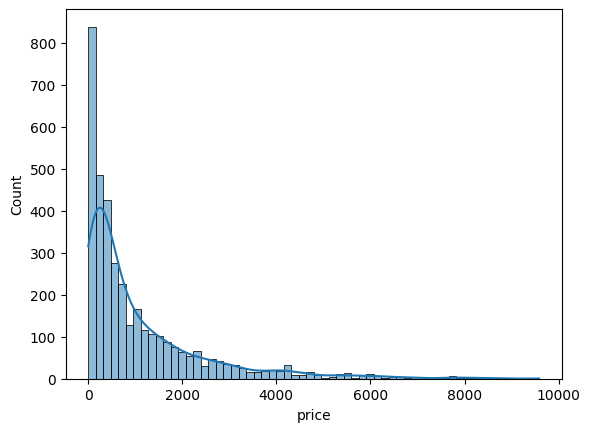

In [160]:
sns.histplot(file['price'], kde=True)
plt.show()

count    3694.000000
mean     1078.208419
std      1374.652494
min         3.000000
25%       180.900000
50%       544.700000
75%      1429.500000
max      9585.000000
Name: price, dtype: float64


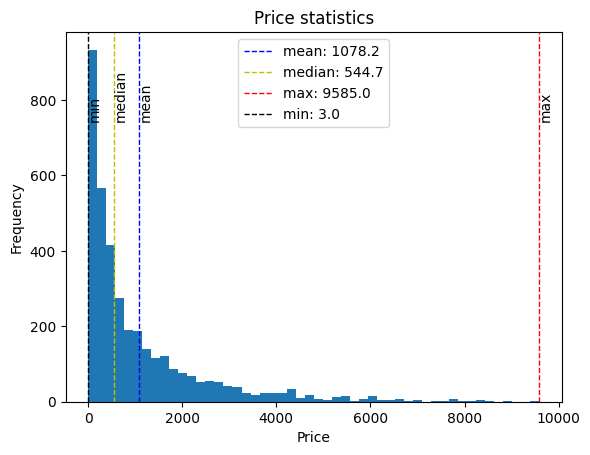

In [161]:
print(file["price"].describe())
plt.hist(file["price"], bins=50)
plt.title("Price statistics")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.axvline(file["price"].mean(), color='b', linestyle='dashed', linewidth=1, label="mean: {:.1f}".format(file["price"].mean()))
plt.axvline(file["price"].median(), color='y', linestyle='dashed', linewidth=1, label="median: {:.1f}".format(file["price"].median()))
plt.axvline(file["price"].max(), color='r', linestyle='dashed', linewidth=1, label="max: {:.1f}".format(file["price"].max()))
plt.axvline(file["price"].min(), color='black', linestyle='dashed', linewidth=1, label="min: {:.1f}".format(file["price"].min()))

plt.text(file["price"].mean(), 750, "mean", rotation=90, va="baseline")
plt.text(file["price"].median(), 750, "median", rotation=90, va="baseline")
plt.text(file["price"].max(), 750, "max", rotation=90, va="baseline")
plt.text(file["price"].min(), 750, "min", rotation=90, va="baseline")
plt.legend()
plt.show()

Дослідивши та очистивши дані, ми бачимо, що:
- в колонці designer була відсутня інформаця та занесені не вірні дані, їх було виправлено на 'No information'
- кількість унікального товару по item_id становить 2962 шт (було 3694шт).
- вього унікальних дизайнерів становить 280(включаючи те, що деякі дизайнери працюють в парах)
- мінімальна ціна 3,00 (item_id:80336433) , максильна ціна 9585.00 (item_id:29277639, 79277632), 
    середня - 1108.72, медіана - 570.00
count    2962.000000
mean     1108.722552
std      1393.576103
min         3.000000
25%       200.000000
50%       570.000000
75%      1475.000000
max      9585.000000
  
- найбільш популярний дизайнер є IKEA of Sweden 
 designer
IKEA of Sweden        683

- найбільшим виробником є BESTÅ
 name
BESTÅ                115

- дослідивши категорії бачимо, що найпопулярнішою є Bookcases & shelving units, а менше всього Room dividers
    та Sideboards, buffets & console tables.
category                                                            
Bookcases & shelving units              548
...
Sideboards, buffets & console tables     10
Room dividers                            10

- Побудувавши графік бачимо, що більшість товарів має низьку ціну, 
 чим більше ціна тим менша кількість товарів, що їй відповідає.

In [162]:
# Описательная статистика по цене в зависимости от производителя
file.groupby("name")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
ADDE,1.0,40.0,NaN,40.0,40.00,40.0,40.00,40.0
ADILS,1.0,15.0,NaN,15.0,15.00,15.0,15.00,15.0
AGAM,4.0,195.0,0.000000,195.0,195.00,195.0,195.00,195.0
AGEN,1.0,245.0,NaN,245.0,245.00,245.0,245.00,245.0
ALEFJÄLL,1.0,1295.0,NaN,1295.0,1295.00,1295.0,1295.00,1295.0
...,...,...,...,...,...,...,...,...
ÖNSKLIG,2.0,59.0,0.000000,59.0,59.00,59.0,59.00,59.0
ÖRFJÄLL,10.0,207.0,15.491933,195.0,195.00,195.0,225.00,225.0
ÖSTERNÄS,6.0,59.5,11.502174,49.0,49.00,59.5,70.00,70.0


In [163]:
price_stats_name = file.groupby("name")["price"].agg(['count', "min", "max", "mean", "median"]).reset_index()
price_stats_name = price_stats_name.sort_values('max', ascending=False).reset_index(drop=True)
print(f' Описательная статистика по цене в зависимости от производителя: \n {price_stats_name}')

 Описательная статистика по цене в зависимости от производителя: 
            name  count     min     max         mean  median
0       LIDHULT     52   100.0  9585.0  3827.961538  3268.0
1       GRÖNLID     83    60.0  8900.0  2552.349398  1610.0
2    KONGSFJORD      2  8356.0  8551.0  8453.500000  8453.5
3    LANDSKRONA     16   100.0  8495.0  3315.000000  2747.5
4         VIMLE     63    50.0  8395.0  2341.904762  1700.0
..          ...    ...     ...     ...          ...     ...
602    BERGENES      1     9.0     9.0     9.000000     9.0
603        BENÖ      1     9.0     9.0     9.000000     9.0
604       HEDRA      3     9.0     9.0     9.000000     9.0
605        FIXA      3     5.6     5.6     5.600000     5.6
606     GUBBARP      3     3.0     3.0     3.000000     3.0

[607 rows x 6 columns]


In [164]:
# Описательная статистика по цене в зависимости от категории
file.groupby("category")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Bar furniture,47.0,679.553191,604.600148,40.0,245.00,445.0,895.50,2375.0
Beds,208.0,1647.432692,1807.961186,30.0,513.75,1093.5,2003.25,9585.0
Bookcases & shelving units,548.0,519.416058,633.009994,3.0,75.00,310.0,695.00,4335.0
Cabinets & cupboards,292.0,789.015753,987.909557,3.0,93.50,402.0,1242.00,6480.0
Café furniture,26.0,553.884615,384.322815,145.0,280.00,424.5,595.00,1385.0
Chairs,481.0,1048.932640,1304.617801,11.4,175.00,425.0,1495.00,6965.0
Chests of drawers & drawer units,125.0,612.180000,450.976085,49.0,245.00,460.0,920.00,1880.0
Children's furniture,124.0,272.758065,251.903400,5.0,98.75,202.5,395.00,1545.0
Nursery furniture,97.0,393.659794,349.562223,5.0,95.00,350.0,595.00,1545.0


In [165]:
price_stats_category = file.groupby("category")["price"].agg(['count', "min", "max", "mean", "median"]).reset_index()
price_stats_category = price_stats_category.sort_values('max', ascending=False).reset_index(drop=True)
print(' Описательная статистика по цене в зависимости от категории: \n')
price_stats_category


 Описательная статистика по цене в зависимости от категории: 



,category,count,min,max,mean,median
0,Sofas & armchairs,428,27.0,9585.0,2004.016355,1268.5
1,Beds,208,30.0,9585.0,1647.432692,1093.5
2,Wardrobes,236,45.0,8380.0,2162.141949,1870.0
3,Tables & desks,612,9.0,6965.0,1129.395425,595.0
4,Chairs,481,11.4,6965.0,1048.932640,425.0
5,Cabinets & cupboards,292,3.0,6480.0,789.015753,402.0
6,Outdoor furniture,216,9.0,5144.0,859.826852,313.7
7,Bookcases & shelving units,548,3.0,4335.0,519.416058,310.0
8,TV & media furniture,190,3.0,4260.0,659.050526,175.0
9,Room dividers,13,189.0,2397.0,932.000000,725.0


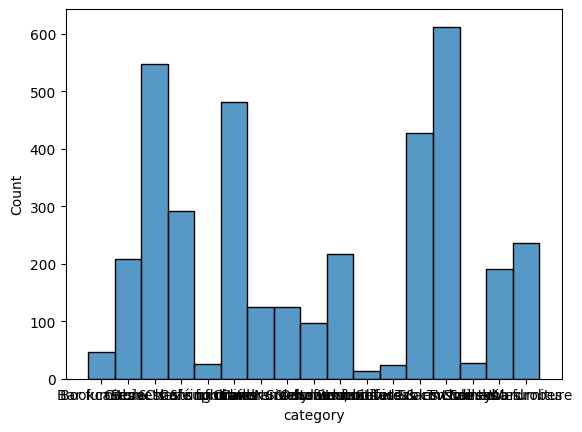

In [166]:
sns.histplot(file['category'])
plt.show()

In [167]:
# Описательная статистика по цене в зависимости от дизайнерa
price_stats_designer = file.groupby("designer")["price"].agg(['count', "min", "max", "mean", "median"]).reset_index()
price_stats_designer = price_stats_designer.sort_values('max', ascending=False).reset_index(drop=True)
print(f' Описательная статистика по цене в зависимости от дизайнерa:')
price_stats_designer

 Описательная статистика по цене в зависимости от дизайнерa:


,designer,count,min,max,mean,median
0,Henrik Preutz/IKEA of Sweden,17,1285.0,9585.0,5811.705882,5553.0
1,Francis Cayouette,151,6.0,8900.0,1052.353642,458.0
2,IKEA of Sweden/Ola Wihlborg/Synnöve Mork,6,1729.0,8551.0,4351.500000,2663.5
3,IKEA of Sweden/Tord Björklund,23,450.0,8495.0,2639.565217,1995.0
4,Ehlén Johansson,161,30.0,8395.0,1648.913043,1280.0
...,...,...,...,...,...,...
195,A Huldén/S Dahlman,1,55.0,55.0,55.000000,55.0
196,J Karlsson/W Chong,1,49.0,49.0,49.000000,49.0
197,Charlie Styrbjörn,3,35.0,35.0,35.000000,35.0
198,Annie Huldén,4,25.0,30.0,27.500000,27.5


Гіпотеза №1: Чи є залежність між ціною та кількістю меблів, які виготовляє дизайнер.
Нульова гіпотеза (H0): Немає залежності між ціною та кількістю меблів, які виготовляє дизайнер.
Альтернативна гіпотеза (H1): Є залежність ціною та кількістю меблів, які виготовляє дизайнер.

In [168]:
#Разбиваем значения в колонке 'designer' на отдельные дизайнеры
file['designer'] =  file['designer'].str.split('/')

# Создаем новую таблицу с дубликатами для каждого дизайнера
data_expanded = file.explode('designer')

# Группировка данных по дизайнеру и подсчет количества мебели для каждого дизайнера
designer_furniture_count = data_expanded.groupby('designer')['item_id'].count().reset_index()
designer_furniture_count = designer_furniture_count.rename(columns={'item_id': 'furniture_count'})

# Объединение данных о количестве мебели с данными об исходной цене
merged_data = data_expanded.merge(designer_furniture_count, on='designer')

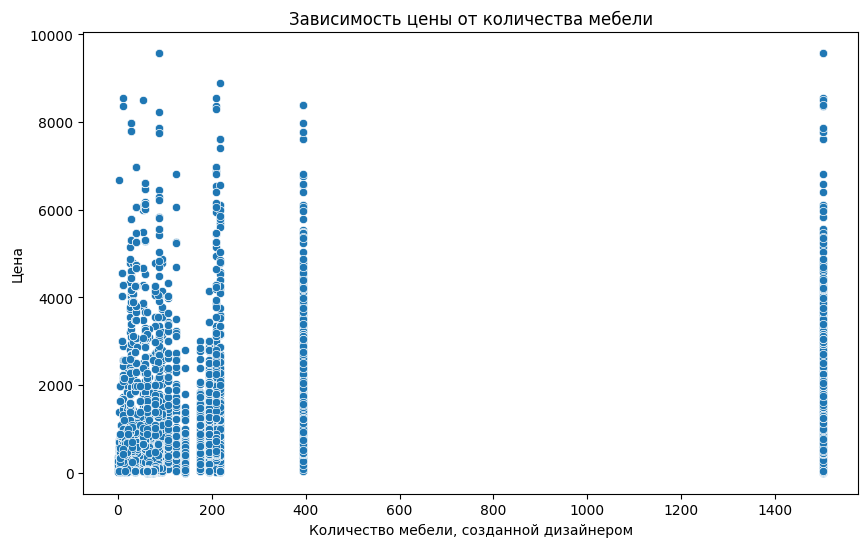

In [169]:
# Создание точечной диаграммы рассеяния для анализа зависимости
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='furniture_count', y='price')
plt.xlabel('Количество мебели, созданной дизайнером')
plt.ylabel('Цена')
plt.title('Зависимость цены от количества мебели')
plt.show()

In [170]:
# Вычисляем корреляцию Пирсона
corr_coefficient, p_value = stats.pearsonr(merged_data['furniture_count'], merged_data['price'])
print(f"Коефіцієнт кореляції Пірсона: {corr_coefficient}")
print(f"P-значення: {p_value}")

Коефіцієнт кореляції Пірсона: -0.021965587631271117
P-значення: 0.10476959540935514


На основі аналізу даних і проведеного кореляційного аналізу, можна зробити такі висновки:
- Після побудови точкової діаграми розсіювання "Залежність ціни від кількості меблів", видно, 
  що дані не демонструють залежності між ціною та кількістю меблів, створених кожним дизайнером.
- Коефіцієнт кореляції Пірсона (-0.01999) який склав близьке до нуля значення,  
  підтверджує відсутність залежності між цими двома змінними.
- P-значення (p-value), що дорівнює 0.19131857236127117, також вказує на 
  відсутність кореляції між двома змінними.

На основі цих результатів можна зробити висновок, 
що немає статистично значущої лінійної залежності 
між ціною меблів і кількістю меблів, створених дизайнерами в цьому наборі даних.
Отже нульова гіпотеза правильна.

Гіпотеза №2: Чи є залежність між висотою та ціною?
Нульова гіпотеза (H0): Немає залежності між висотою та ціною.
Альтернативна гіпотеза (H1): Є залежність між висотою та ціною.

In [171]:
# Удалить строки с NaN значениями
file = file.dropna(subset=['height', 'price'])

In [172]:
# Розрахунок коефіцієнта кореляції та p-value
corr, p_value = pearsonr(file['height'], file['price'])
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.2786209277879185
P-value: 1.954456679279467e-49


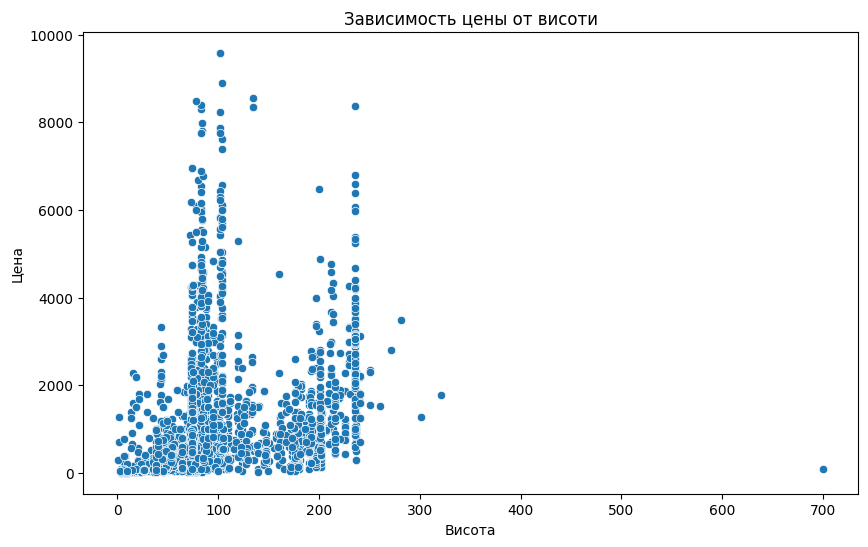

In [173]:
plt.figure(figsize=(10, 6))
sns.scatterplot(file, x='height', y='price')
plt.xlabel('Висота')
plt.ylabel('Цена')
plt.title('Зависимость цены от висоти')
plt.show()

На основі аналізу даних і проведеного кореляційного аналізу, можна зробити такі висновки:
- На точковій діаграмі розсіювання не спостерігається чіткої залежності між висотою 
   та ціною. Точки розосереджені випадковим чином, і немає явного тренда.
- Коефіцієнт кореляції Пірсона дорівнює 0.2785481721918809, що вказує на існування
   позитивної кореляції між двома змінними. Це означає, що збільшення значення однієї
   змінної (у цьому випадку, 'height') пов'язане зі збільшенням значення іншої змінної ('price').
- P-значення дорівнює 3.9880708840634357e-41, що вкрай близько до нуля. Це дуже маленьке 
   P-значення, що вказує на статистичну значущість кореляції. Іншими словами, існує 
   позитивна кореляція між висотою товарів та їх ціною.

На основі цієї інформації можна зробити висновок про те, що існує статистично 
значуща позитивна кореляція між висотою товарів та їх ціною. Високі товари, 
можливо, мають вищі ціни, і це явище статистично підтверджено.